# *Exploring TTC Streetcar Delays and Forecasting Delays*

- Created on: November, 2023
- Created by: Jessica Seo
---------

## 🚂 XGBoost Modelling

### Notebook Contents

- [Introduction](#introID)
- [Data Loading](#loadingID)
- [XGBoost](#modelID)
    - Hyperoptimization Tuning
    - Model Evaluation 
- [Summary](#summaryID)
- [Model Saving](#saveID)
-------

## <a id='introID'> Introduction </a>

The next machine learning model we will use in this notebook is XGBoost (Extreme Gradient Boosting). XGBoost is effective for imbalanced classification tasks, making it the right model for our case. Let's find out how the model will perform.

----
## <a id='loadingID'> Data Loading</a>

In [2]:
#importing necessary python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing modelling library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [4]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#loading data
df=pd.read_csv('train_test_model.csv')
df

,Temperature,Precipitation,Summer_PT,Winter_PT,Day,Line,Min_Delay,Year,Month,Date,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
0,-2.0,0.0,False,True,4,501,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
1,-2.0,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
2,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.4,0.0,False,False,4,506,2,2021,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41619,16.6,0.0,False,False,5,511,2,2023,9,30,...,0,0,0,0,0,0,0,0,0,0
41620,16.9,0.0,False,False,5,505,2,2023,9,30,...,0,0,0,0,0,0,0,0,1,0
41621,16.9,0.0,False,False,5,513,2,2023,9,30,...,0,0,0,0,0,1,0,0,0,0
41622,16.9,0.0,False,False,5,501,2,2023,9,30,...,0,0,0,0,0,0,0,0,0,0


##  <a id='modelID'> XGBoost Model </a>

In [6]:
#Defining train and test

X=df.drop('Min_Delay', axis=1)
y=df['Min_Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=101)

In [7]:
# Initialize the XGBoost classifier
train_model = XGBClassifier()

# Train the model
train_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = train_model.predict(X_test)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
DT_train_baseline = train_model.score(X_train, y_train)
DT_test_baseline = train_model.score(X_test, y_test)

# Display the results

print(f"XGboost Train Accuracy: {DT_train_baseline}")
print(f"XGboost Test Accuracy: {DT_test_baseline}")

XGboost Train Accuracy: 0.7506177924217463
XGboost Test Accuracy: 0.6321268417680974


XGBoost improves its accuracy by correcting mistakes made by the previous models. Considering the baseline accuracy mentioned earlier, it appears that there may be overfitting in the training sets. Let's optimize the hyperparameters for better performance.

In [50]:
#Find the best parameter 
# A parameter grid for XGBoost
params = {
        #'booster':['gbtree','gblinaer','dart'],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'booster':['gbtree','dart'],
        'colsample_bytree': [0.5,1.0,1.5]
        }

In [51]:
trial_model = XGBClassifier()

GS = GridSearchCV(estimator=trial_model, param_grid=params, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')

In [52]:
#fitting the second gridsearch
GS.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'dart'],
                         'colsample_bytree': [0.5, 1.0, 1.5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=True)

In [16]:
#first
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Best Parameters: {'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}

Best Score: 0.6247599717736488


In [47]:
#Instantiate the model
xgbc_train_model = XGBClassifier(max_depth=6,min_child_weight=12,subsample=1.0, booster='gbtree', \
                                colsample_bytree=0.5)

#Fit the model
xgbc_train_model.fit(X_train, y_train)

#Predicting the model
y_train_pred = xgbc_train_model.predict(X_train)
y_test_pred = xgbc_train_model.predict(X_test)

#finding the accuracy
train_accuracy= accuracy_score(y_train, y_train_pred)
test_accuracy= accuracy_score(y_test, y_test_pred)

# Display the results
print(f"XGBoost Train Accuracy: {train_accuracy}")
print(f"XGBoost Test Accuracy: {test_accuracy}")

XGBoost Train Accuracy: 0.7087108731466227
XGBoost Test Accuracy: 0.6301249199231262


It is giving us slight improvement but the model is overfitting.

In [42]:
#looking at the best correlation features
# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgbc_train_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(15)

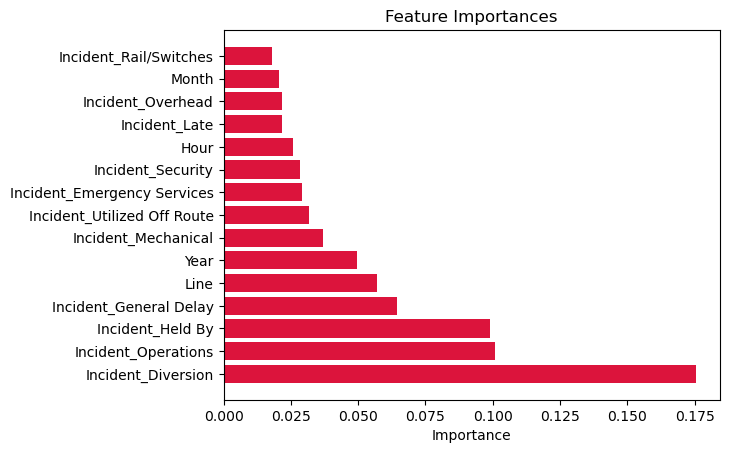

In [43]:
# Plot the feature importances
plt.figure()
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='crimson')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Interstingly, the cause of delay seems to have the most correlation in predicting delays in this model.

## Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      3376
           1       0.63      0.65      0.64      4523
           2       0.63      0.70      0.66      4589

    accuracy                           0.63     12488
   macro avg       0.63      0.62      0.62     12488
weighted avg       0.63      0.63      0.63     12488



Confusion Matrix:


,Predicted-Slight Delay,Predicted-Moderate Delay,Predicted-Severe Delay
True-Slight Delay,1724,840,812
True-Moderate Delay,549,2940,1034
True-Severe Delay,496,888,3205


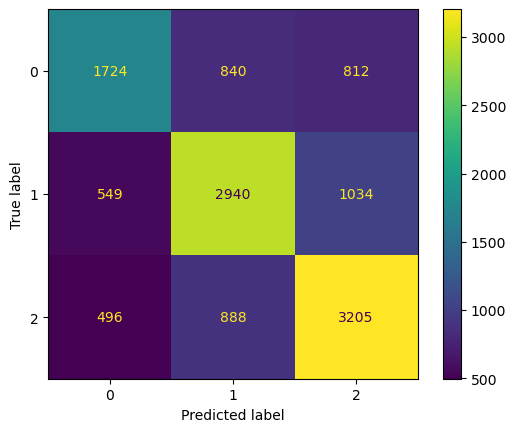

In [45]:
#Confusion Matrix
#Get class predictions
y_pred = xgbc_train_model.predict(X_test)

# Generate confusion matrix
df_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
df = pd.DataFrame(
    df_matrix, 
    columns = ["Predicted-Slight Delay","Predicted-Moderate Delay", "Predicted-Severe Delay"],
    index = ["True-Slight Delay","True-Moderate Delay", "True-Severe Delay"]
)


from sklearn.metrics import classification_report
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(xgbc_train_model, X_test, y_test);

classification_report = classification_report(y_test, y_test_pred)
print('Classification Report:')
print(classification_report)

print('\n')
print('Confusion Matrix:')
display(df)

- The overall accuracy of the model is 63%.
- Each class has about 62% of precision accuracy.
- By looking at the recall measure, Moderate Delay seems to have the highest sensitivity.
- Moderate Delay has misclassification into Slight (approx. 550 instances) and Severe(approx. 1000 instances) Delay.

## <a id='summaryID'> Summary </a>

In conclusion, it appears XGboost model performs better at predicting delay by 63%. It is giving us slight more accuracy compared to the Decision Tree model.  

### <a id='saveID'> Model Saving </a>

In [53]:
from joblib import dump, load

# Save the model
dump(xgbc_train_model, 'XGBoost_model.joblib')

['XGBoost_model.joblib']